In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import io
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from urllib.request import urlopen, Request
from PIL import Image

%matplotlib inline

In [2]:
def image_spoof(self, tile):
    url = self._image_url(tile) # Obtiene Url de la API
    req = Request(url) # Realiza el request
    req.add_header('User-agent','Anaconda 3') # Usuario 
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # Obtiene Mapa
    fh.close() # Cierra Conexión
    img = Image.open(im_data) # Utiliza la lib PIL para abrir la imagen
    img = img.convert(self.desired_tile_form) # Configura la formatación de la imagen
    return img, self.tileextent(tile), 'lower' # Reformatea para usar Cartopy

In [38]:
PATH_DADOS = '../dados/'
PATH_FIGURE = '../figure/'
FILE_DATOS_ESTACION = 'events_MM_nxny1426.csv'

In [4]:
df = pd.read_csv(PATH_DADOS + FILE_DATOS_ESTACION, 
                 sep = ';', 
#                  parse_dates = ["date_min_t", "date_max_dt"],
#                  date_parser = lambda col: pd.to_datetime(col)
                )
lons_t = df['lon_t']
lats_t = df['lat_t']
lons_dt = df['lon_dt']
lats_dt = df['lat_dt']

In [27]:
df_aux = df.groupby(['lon_t', 'lat_t']).agg(['count']).reset_index()
df_aux = df_aux[['lon_t', 'lat_t', 'date_min_t']]
df_aux_dt = df.groupby(['lon_dt', 'lat_dt']).agg(['count']).reset_index()
df_aux_dt = df_aux_dt[['lon_dt', 'lat_dt', 'date_min_t']]

8.0


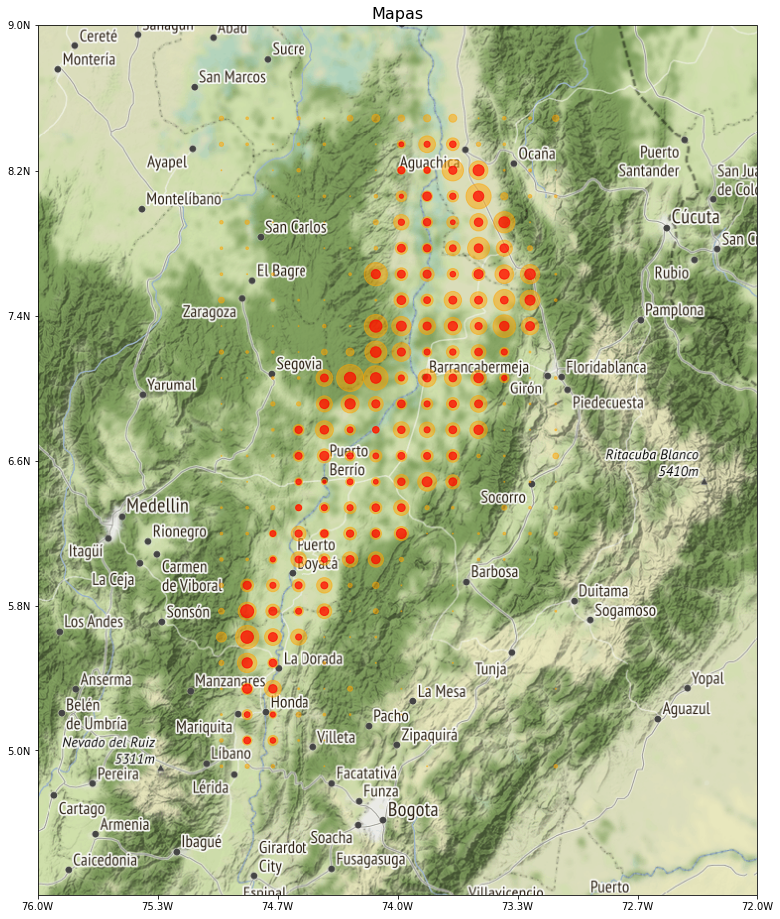

In [41]:
cimgt.Stamen.get_image = image_spoof # Realiza el llamado a la API
osm_img = cimgt.Stamen('terrain') # Descargar el mapa

fig = plt.figure(figsize=(24,16))
ax1 = plt.axes(projection=osm_img.crs) # Proyecta usando las coordenadas del sistema de referencia crs
ax1.set_title('Mapas',fontsize=16)
extent = [-76, -72, 4.2, 9] 
# extent = [-81.85, -66.854722, -4.214722, 13.383333] ## Mapa de Colombia
# lon_min, lon_max, lat_min, lat_max

ax1.set_extent(extent) # Configura el mapa
ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # Configura los indicadores de longitud
ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # Configura los indicadores de latitud
lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # Formata longitud
lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # Formata Latitud

ax1.xaxis.set_major_formatter(lon_formatter) # Configura Longitud
ax1.yaxis.set_major_formatter(lat_formatter) # Configura Latitud
# ax1.xaxis.set_tick_params(labelsize=14)
# ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # Cálculo empírico para obtener el zoom basado en la escala
scale = (scale<20) and scale or 19 # Escaliza la imagen (Renderización)
# scale = 8
print(scale)
ax1.add_image(osm_img, int(scale)) # Adiciona la imagén y aplica el zoom
# size = 1
# ax1.scatter(lons_dt, lats_dt, s=50, alpha= 0.8, transform=ccrs.PlateCarree(), color=['orange'])
# ax1.scatter(lons_t, lats_t, s=10, alpha= 1, transform=ccrs.PlateCarree(), color=['red'])
ax1.scatter(df_aux_dt['lon_dt'], df_aux_dt['lat_dt'], s=df_aux_dt['date_min_t']**1.8, alpha= 0.5, transform=ccrs.PlateCarree(), color=['orange'])
ax1.scatter(df_aux['lon_t'], df_aux['lat_t'], s=df_aux['date_min_t']**1.3, alpha= 0.7, transform=ccrs.PlateCarree(), color=['red'])

plt.savefig(PATH_FIGURE + 'Mapa_eventos.png', format='png', bbox_inches = 'tight' )

In [18]:
df.groupby(['lon_t', 'lat_t']).agg(['count'])

date_min_t min_t date_max_dt lon_dt lat_dt max_dt
                   count count       count  count  count  count
lon_t   lat_t                                                  
-74.836 5.055         19    19          19     19     19     19
        5.198         15    15          15     15     15     15
        5.341         30    30          30     30     30     30
        5.484         36    36          36     36     36     36
        5.627         49    49          49     49     49     49
...                  ...   ...         ...    ...    ...    ...
-73.407 7.773         28    28          28     28     28     28
        7.916         40    40          40     40     40     40
-73.264 7.344         29    29          29     29     29     29
        7.487         35    35          35     35     35     35
        7.630         38    38          38     38     38     38

[119 rows x 6 columns]